# Laboratoire 6
Segmentation de contours

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import skimage.data
from skimage.feature import canny
from scipy.ndimage import gaussian_filter, convolve, correlate
from skimage.transform import hough_line
from math import sin, cos, tan, radians

## Exercice 1
Implémenter en partie le filtre de Sobel:
1. Si l'image est bruité, appliquer un filtre gaussian
2. Trouver les contours
    - Trouver les gradients X
    - Trouver les gradients Y
2. Combiner les gradients pour obtenir le résultat final

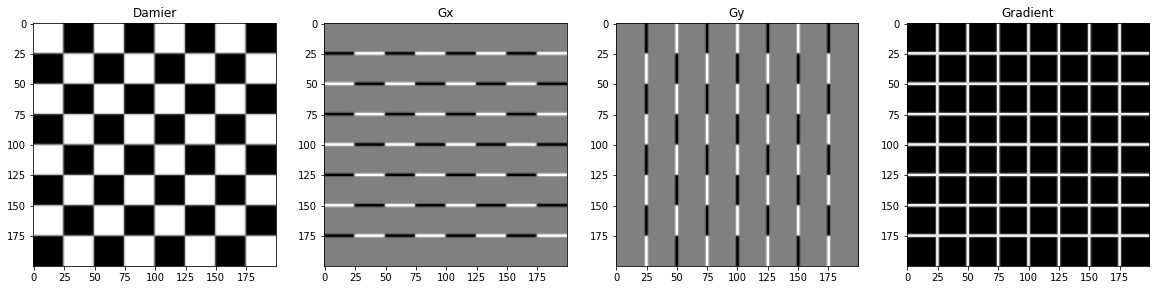

Help on function gradient in module numpy:

gradient(f, *varargs, axis=None, edge_order=1)
    Return the gradient of an N-dimensional array.
    
    The gradient is computed using second order accurate central differences
    in the interior points and either first or second order accurate one-sides
    (forward or backwards) differences at the boundaries.
    The returned gradient hence has the same shape as the input array.
    
    Parameters
    ----------
    f : array_like
        An N-dimensional array containing samples of a scalar function.
    varargs : list of scalar or array, optional
        Spacing between f values. Default unitary spacing for all dimensions.
        Spacing can be specified using:
    
        1. single scalar to specify a sample distance for all dimensions.
        2. N scalars to specify a constant sample distance for each dimension.
           i.e. `dx`, `dy`, `dz`, ...
        3. N arrays to specify the coordinates of the values along each
        

In [3]:
img = skimage.data.checkerboard()


"""
Équivalent à un kernel [-1, 0, 1] qu'on lisse avec une gaussienne
"""
hx = np.array(
    [
        [-1,0,1],
        [-2,0,2],
        [-1,0,1]
    ])


hy = np.array(
    [
        [-1,-2,-1],
        [0,0,0],
        [1,2,1]
    ])

plt.figure(figsize=(20,20))

gx, gy = np.gradient(img)

plt.subplot(141); plt.title('Damier'); plt.imshow(img, cmap='gray')

plt.subplot(142); plt.title('Gx'); plt.imshow(gx, cmap='gray')

plt.subplot(143); plt.title('Gy'); plt.imshow(gy, cmap='gray')

g = np.sqrt(gx**2 + gy**2)
plt.subplot(144); plt.title('Gradient'); plt.imshow(g, cmap='gray')

plt.show()



## Exercice 2
Appliquer la méthode de Canny avec différentes valeurs pour le *sigma* et les *thresholds*.

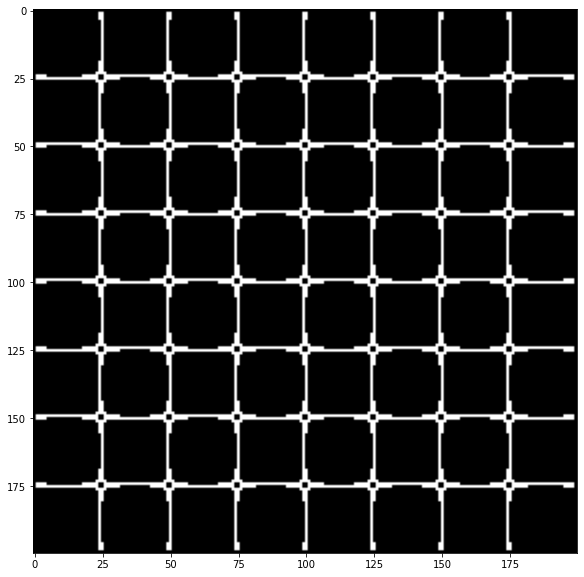

In [8]:
img_canny = canny(img,1, 30, 120)


plt.figure(figsize=(10,10))
plt.imshow(img_canny, cmap='gray'); plt.show()

## Exercice 3
Tracer la courbe des points **(x:3, y:9)** et **(x:10, y:5)** dans l'espace paramètre de la transformer de Hough ($\theta$, $\rho$)  

$x$ $cos \theta$ $+$ $y$ $sin \theta$ $=$ $\rho$  

Pour $\theta$ entre 0 et 180 degrés

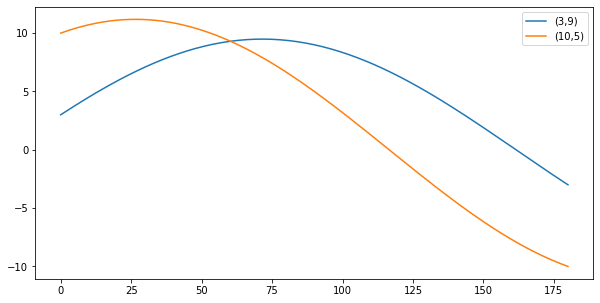

In [10]:
def roe(x,y,t):
    return x*cos(t) + y*sin(t)
c1 = []
c2 = []
for theta in range(0,181):
    c1.append(roe(3,9,theta * np.pi / 180))
    c2.append(roe(10,5,theta * np.pi / 180))

c1 = np.array(c1)
c2 = np.array(c2)



fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(range(len(c1)), c1, label="(3,9)")
ax.plot(range(len(c1)), c2, label="(10,5)")
plt.legend()
plt.show()

Afficher maintenant la droite trouvée avec l'intersection des 2 courbes dans le domaine de l'image.  

60


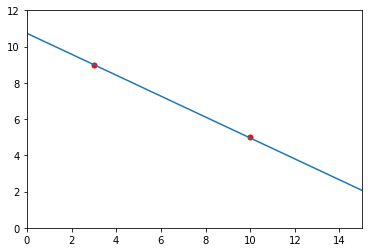

In [14]:
#trouver l'intersection
diff = np.abs(c1 - c2)
i_min = np.argmin(diff)
print(i_min)

x = [0, 15]
m = -tan(radians(90-i_min))
y = []
b = 9 - m*3 
for i in x :
    y.append(i*m + b)




# afficher la droite résultante
plt.plot([3], [9], marker='o', markersize=5, color="red")
plt.plot([10], [5], marker='o', markersize=5, color="red")
plt.plot(x, y) 
plt.xlim(0, 15)
plt.ylim(0, 12)
plt.show()